In [69]:
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import seaborn as sn

import math

In [51]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

In [7]:
x, y = load_iris(return_X_y=True)

In [10]:
class KNN:
  def __init__(self, k, X, y):
    self.k = k
    self.X = X
    self.y = y

  def predict(self, X):
    distances = self.calculate_distances(X)

    k_nearest = distances.argsort()[:self.k]
    k_nearest = self.y[k_nearest].tolist()

    return max(set(k_nearest), key=k_nearest.count)


  def calculate_distances(self, X):
    distances = np.zeros(self.X.shape[0])
    for i in range(self.X.shape[0]):
      distances[i] = math.sqrt(sum([(p - q)**2 for p, q in zip(X, self.X[i])]))

    return distances

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [82]:
model = KNN(5, x_train, y_train)

In [83]:
predictions = []
for x in x_test:
  predictions.append(model.predict(x))

In [84]:
acc = accuracy_score(y_test, predictions)

In [85]:
cm = confusion_matrix(y_test, predictions)
df_cm = pd.DataFrame(cm, index=[i for i in ['Setosa', 'Versicolor', 'Virginica']],
                      columns=[i for i in ['Setosa', 'Versicolor', 'Virginica']])

A Acurácia é de: 96.66666666666667%


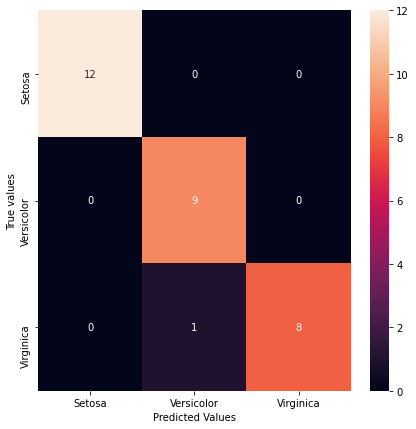

In [86]:
print("A Acurácia é de: {}%".format(acc * 100))
plt.figure(figsize=(7,7))
sn.heatmap(df_cm, annot=True)

plt.ylabel('True values')
plt.xlabel('Predicted Values')

plt.show()